<a href="https://colab.research.google.com/github/audreyemmely/pln/blob/main/pln_lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resolução Lista 4**

---

Audrey Emmely Rodrigues Vasconcelos

Karen Nayara Gomes da Silva

In [1]:
#from google.colab import files
#uploaded = files.upload()
# upando train_data e test_data_solution

In [2]:
!pip install yellowbrick
!pip install umap-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import random
import time
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
from sklearn.cluster import KMeans
from bokeh.palettes import Category20
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from sklearn.manifold import TSNE
from yellowbrick.cluster import KElbowVisualizer
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

In [4]:
output_notebook()

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [6]:
df = pd.read_csv('train_data.txt', sep =':::', header = None, engine = 'python', nrows = 2000)
df.columns = ['id', 'title', 'genre', 'description']
df2 = pd.read_csv('test_data_solution.txt', sep =':::', header = None, engine = 'python', nrows = 2000)
df2.columns = ['id', 'title', 'genre', 'description']

In [7]:
dataset = pd.concat([df, df2], ignore_index=True)
dataset.drop(['id','genre'], axis=1, inplace=True)

In [8]:
def preprocess(description):
  description = re.sub(r'\w*\d\w*', '', description) #remove todas as palavras que contêm números
  description = re.sub(r'[^a-zA-Z ]', '', description.lower())
  return re.sub(r'\s+', ' ', description) #retira espaços repetidos

In [9]:
dataset['processed_description'] = dataset.description.apply(preprocess)

In [10]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(description):
    tokenized_text = nltk.word_tokenize(description, language='english')
    return " ".join([token for token in tokenized_text if token not in stop_words])

In [11]:
dataset['processed_description'] = dataset.processed_description.apply(remove_stopwords)

In [12]:
dataset

,title,description,processed_description
0,Oscar et la dame rose (2009),Listening in to a conversation between his do...,listening conversation doctor parents yearold ...
1,Cupid (1997),A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...
...,...,...,...
3995,L'absence (2009/II),"Adama Diop is a successful scientist, living ...",adama diop successful scientist living paris y...
3996,Blood Circus (2017),"Sean ""THE KILLIN'"" Dillon was on top of the w...",sean killin dillon top world become decorated ...
3997,Gangsta Brown Master of the Game (2016),This DVD consists of 22 fictional characters ...,dvd consists fictional characters including mr...
3998,Treasure of the Golden Condor (1953),Jean-Paul rebels against his bondage to his u...,jeanpaul rebels bondage uncle marquis de st ma...


## Questão 1

Realize um comparativo entre os métodos LDA, SVD e NMF para realizar
modelagem de tópicos. Para cada método:

a) empiricamente, tente identificar uma quantidade de tópicos adequada para
seu problema. Exiba resultados que justifiquem a quantidade de tópicos
escolhida;

b) identifique as 5 palavras mais relevantes de cada tópico;

c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você
pode representar os tópicos por suas 5 palavras mais relevantes).

d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

In [13]:
n_topics = 5
samples = dataset.sample(n=5)
samples.reset_index(inplace=True)
samples

,index,title,description,processed_description
0,2218,The Obsidian Curse (2016),"Blair Jensen, a young mother, get's released ...",blair jensen young mother gets released prison...
1,1503,"Missing, Believed Married (1937)",A heiress discovers during her engagement tha...,heiress discovers engagement man marry fortune...
2,3127,The Seduction of Joe Tynan (1979),Respected liberal Senator Joe Tynan is asked ...,respected liberal senator joe tynan asked lead...
3,3336,The Kois: Fish Out of Water (2009),The ups and downs of teen life are magnified ...,ups downs teen life magnified allgirl high sch...
4,2427,Fast Zombies with Guns (2009),Collateral damage....sometimes it's unavoidab...,collateral damagesometimes unavoidable paul va...


Utilizando TF-IDF como embbeding dos textos

In [14]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dataset.processed_description)

In [15]:
for decomposition_algorithm in (LatentDirichletAllocation, TruncatedSVD, NMF):
    algorithm = decomposition_algorithm(n_components=n_topics)
    X_topics = algorithm.fit_transform(X)

    def get_top_words(topic, n, words, algorithm):
      sorted_idxs = np.argsort(algorithm.components_[topic])
      top_words = [words[i] for i in sorted_idxs]
      return [w for w in reversed(top_words[-n:])]

    print(f'Algoritmo: {decomposition_algorithm.__name__}')
    for i in range(n_topics):
        print(f'Tópico {i + i} -> {get_top_words(i, 5, tfidf.get_feature_names(), algorithm)}')
    print('\n')

    sample_topics = algorithm.transform(tfidf.transform(samples.processed_description))

    for i, sample in samples.iterrows():
        print(f'{sample.title}')
        print(sample.description[:70] + '...')
        print(sample_topics[i])
        print('\n')

Algoritmo: LatentDirichletAllocation
Tópico 0 -> ['one', 'life', 'film', 'story', 'time']
Tópico 2 -> ['life', 'film', 'one', 'story', 'new']
Tópico 4 -> ['life', 'young', 'film', 'one', 'world']
Tópico 6 -> ['life', 'one', 'new', 'film', 'world']
Tópico 8 -> ['life', 'film', 'new', 'one', 'world']


 The Obsidian Curse (2016) 
 Blair Jensen, a young mother, get's released out of prison after bein...
[0.02949073 0.02925364 0.88301041 0.02924527 0.02899995]


 Missing, Believed Married (1937) 
 A heiress discovers during her engagement that the man she is about t...
[0.8635487  0.03421241 0.03404556 0.03404888 0.03414445]


 The Seduction of Joe Tynan (1979) 
 Respected liberal Senator Joe Tynan is asked to lead the opposition t...
[0.02837264 0.0280808  0.88754593 0.0279945  0.02800614]


 The Kois: Fish Out of Water (2009) 
 The ups and downs of teen life are magnified by an all-girl high scho...
[0.02047709 0.02046967 0.0203794  0.91832165 0.02035218]


 Fast Zombies with Guns (2009)

Melhor algoritmo: NMF


## Questão 2
Realize um agrupamento dos dados seguindo os seguintes passos:

a) Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a
dimensão resultante dos dados projetados?

b) Aplique um algoritmo k-means nos dados projetados, usando o método elbow
para encontrar o valor de k ótimo.

c) Finalmente, aplique um algoritmo k-means nos dados originais (sem projeção
por PCA), usando o método elbow para encontrar o valor de k ótimo.

In [16]:
stemmer = nltk.stem.RSLPStemmer()
dataset['stemmed_text'] = dataset.processed_description.apply(lambda tokens: ' '.join([stemmer.stem(token) for token in tokens.split(' ')]))
X = tfidf.fit_transform(dataset.stemmed_text)

In [17]:
Xproj = PCA(n_components=.95).fit_transform(X.toarray())

In [18]:
Xproj.shape[1]

3311

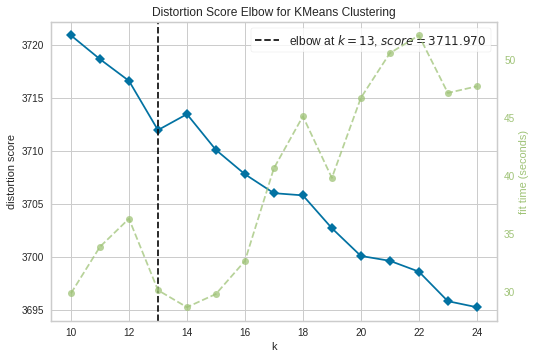

In [19]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(Xproj)
visualizer.show()

In [20]:
k = 13
kmeans_proj = KMeans(n_clusters=k).fit(Xproj)

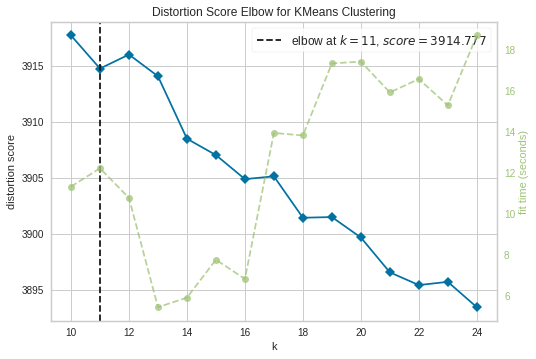

In [21]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(X)
visualizer.show()

In [22]:
k = 11
kmeans = KMeans(n_clusters=k).fit(X)

## Questão 3
Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.

a) aplique os métodos de projeção multidimensional t-SNE e UMAP nos dados resultantes da questão 2b, e plote os gráficos das projeções resultantes, codificando as cores dos pontos de acordo com os grupos obtidos pelo k-means.

b) compare o tempo de execução e a qualidade visual da projeção dos 2 métodos
de projeção multidimensional, no resultado da questão 2b.

c) usando o método de projeção multidimensional que gerou melhores resultados no item anterior, calcule a projeção nos resultados da questão 2c e compare visualmente os resultados da questão 2b e 2c. Qual abordagem
funcionou melhor?

In [23]:
start = time.time()
X_tsne = TSNE(n_components = 2).fit_transform(Xproj)
duration = time.time() - start

In [24]:
print('%s segundos' %duration)

42.465920209884644 segundos


In [25]:
palette = Category20[k]

In [26]:
def scatter_plot(X, labels):
  scatter_plot = figure(plot_width = 1000, plot_height = 500)
  scatter_plot.circle(X[:, 0], X[:, 1], size = 10, line_color=[palette[l] for l in labels], 
                      fill_color=[palette[l] for l in labels], fill_alpha=.8)
  show(scatter_plot)

In [27]:
scatter_plot(X_tsne, kmeans.labels_)

In [28]:
start = time.time()
X_umap = umap.UMAP().fit_transform(Xproj)
duration = time.time() - start

In [29]:
print('%s segundos' %duration)

50.72049403190613 segundos


In [30]:
scatter_plot(X_umap, kmeans.labels_)

Com os dados projetados, o método de projeção multidimensional foi o TSNE.

In [32]:
start = time.time()
X_tsne = TSNE(n_components = 2).fit_transform(X)
duration = time.time() - start

In [33]:
print('%s segundos' %duration)

48.420746088027954 segundos


In [34]:
scatter_plot(X_tsne, kmeans.labels_)

In [35]:
dataset['label'] = kmeans.labels_

In [36]:
def cluster_topic(dataset, cluster_label, n_words):
  X = tfidf.fit_transform(dataset[dataset['label'] == cluster_label].processed_description)
  nmf = NMF(n_components=1)
  X_topics = nmf.fit_transform(X)
  return get_top_words(0, n_words, tfidf.get_feature_names(), nmf)

In [37]:
n_words = 10
display(HTML('<h2>Top {} palavras de cada grupo</h2>'.format(n_words)))
for label, color in enumerate(palette):
  display(HTML('<h3><span style="color:{}"><strong>Grupo {}: {}</strong></span></h3>'.format(color, label, ', '.join(cluster_topic(dataset, label, n_words)))))

**Referências**

[Introduction to Topic Modeling using Scikit-Learn](https://towardsdatascience.com/introduction-to-topic-modeling-using-scikit-learn-4c3f3290f5b9)

[PCA using Python (scikit-learn)](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

[K-Means Clustering](https://towardsdatascience.com/k-means-clustering-8e1e64c1561c)

[Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)
